
### HYPOTHESIS :Higher the number of genre, higher is the profit


In [41]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading the Dataset

In [42]:
df_c = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")

In [43]:
df_c.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [44]:
# reading the CSV file
df_m = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

In [45]:
df_m.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [46]:

# Merge on 'id' and 'movie_id'
df = df_m.merge(df_c, left_on='id', right_on='movie_id', how='inner')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [47]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [49]:
#find number of Nan values in every columns
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [50]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


### Data Cleaning
I have to :
* Drop unused columns in our analysis from the DataFrame
* Drop the duplicated rows.
* Remove the movies which have zero budget and revenue.Zero value in budget and revenue columns means that the values of those variables has not been recorded.I replace the values from ‘0’ to ‘NAN’, then drop the rows which have missing values, since we cannot have a fair estimate for those values, considering more than 25 percent of those columns were empty.
* Since most movies had on an average a similar runtime, that's why I chose to use median to fill the 'NAN' values since it avoids the noise due to extreme cases.But at the end those values had zero budget or revenue, that's why they got automatically removed.
* Change the format of release date into Datetime format
* Check whether all columns are in the desired data type.Otherwise I have to convert their datatype
* Took the last genre as the primary genre from observation
* Calculate the number of actors in the movie and created a column for it
* Created columns for, top 3 actors, all genre, primary actor, profit of each movie .

In [51]:
df_clean = df.copy()

df_clean = df_clean.drop(['id','homepage','tagline','keywords','overview'], axis=1)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  spoken_languages      4803 non-null   object 
 11  status                4803 non-null   object 
 12  title_x               4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
 15  movie_id             

In [52]:
df_clean.drop_duplicates(inplace =True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  spoken_languages      4803 non-null   object 
 11  status                4803 non-null   object 
 12  title_x               4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
 15  movie_id             

In [53]:
#Replace the values from ‘0’ to ‘NAN’, 
#then drop the rows which have missing values in budget and revenue and runtime columns
df_clean[['budget', 'revenue', 'runtime']] =df_clean[['budget', 'revenue', 'runtime']].replace(0,np.NAN)

#### now we can handle null values that were recorded as zeros.


In [54]:
print(df_clean.isna().sum())

budget                  1037
genres                     0
original_language          0
original_title             0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                 1427
runtime                   37
spoken_languages           0
status                     0
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64


In [55]:
df_clean.dropna(subset=['budget', 'revenue'], inplace=True)
print('After cleaning, we have {} rows'.format(df_clean.shape[0]))
print(df_clean.isna().sum())

After cleaning, we have 3229 rows
budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
movie_id                0
title_y                 0
cast                    0
crew                    0
dtype: int64


In [56]:
#Now we change the format of release date into Datetime format
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'], format='mixed', errors='coerce')
df_clean['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [57]:
#now we check the datatype of each column
df_clean.dtypes

budget                         float64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
title_x                         object
vote_average                   float64
vote_count                       int64
movie_id                         int64
title_y                         object
cast                            object
crew                            object
dtype: object

In [58]:
#add a profit column by subtract budget from revenue
df_clean['profit']=df_clean['revenue']-df_clean['budget']
df_clean.describe()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,movie_id,profit
count,3.229000e+03,3229.000000,3229,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000,3.229000e+03
mean,4.065444e+07,29.033689,2002-03-21 04:03:29.600495488,1.212430e+08,110.724373,6.309353,977.287395,44780.705791,8.058851e+07
min,1.000000e+00,0.019984,1916-09-04 00:00:00,5.000000e+00,41.000000,0.000000,0.000000,5.000000,-1.657101e+08
25%,1.050000e+07,10.446722,1998-09-11 00:00:00,1.700000e+07,96.000000,5.800000,178.000000,4958.000000,2.113940e+05
50%,2.500000e+07,20.410354,2005-07-20 00:00:00,5.518472e+07,107.000000,6.300000,471.000000,11451.000000,2.616557e+07
75%,5.500000e+07,37.335721,2010-11-12 00:00:00,1.462920e+08,121.000000,6.900000,1148.000000,45272.000000,9.748982e+07
max,3.800000e+08,875.581305,2016-09-09 00:00:00,2.787965e+09,338.000000,8.500000,13752.000000,417859.000000,2.550965e+09
std,4.439674e+07,36.165730,NaN,1.863029e+08,20.965694,0.873891,1414.309577,74609.434723,1.581479e+08


In [59]:
df_clean.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title_x',
       'vote_average', 'vote_count', 'movie_id', 'title_y', 'cast', 'crew',
       'profit'],
      dtype='object')

In [60]:
df_clean['genres'][2]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'

In [61]:
import pandas as pd
import ast

# --- Extract Primary Genre ---
def extract_primary_genre(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        if isinstance(genres, list) and len(genres) > 0:
            return genres[-1]['name']   # first genre
    except:
        return None
    return None

# --- Extract All Genres ---
def extract_all_genres(genres_str):
    try:
        genres = ast.literal_eval(genres_str)
        if isinstance(genres, list):
            return [g['name'] for g in genres]
    except:
        return []
    return []

# --- Count Number of Actors ---
def count_actors(cast_str):
    try:
        cast = ast.literal_eval(cast_str)
        if isinstance(cast, list):
            return len(cast)
    except:
        return 0
    return 0

# --- Extract Top 3 Actors ---
def top_3_actors(cast_str):
    try:
        cast = ast.literal_eval(cast_str)
        if isinstance(cast, list):
            return [c['name'] for c in cast[:3]]
    except:
        return []
    return []

# --- Extract Top 1 Actor ---
def top_actor(cast_str):
    try:
        cast = ast.literal_eval(cast_str)
        if isinstance(cast, list) and len(cast) > 0:
            return cast[0]['name']
    except:
        return None
    return None

# ✅ Apply transformations
df_clean['primary_genre']   = df_clean['genres'].apply(extract_primary_genre)
df_clean['all_genres']      = df_clean['genres'].apply(extract_all_genres)
df_clean['number_of_actors']= df_clean['cast'].apply(count_actors)
df_clean['top_3_actors']    = df_clean['cast'].apply(top_3_actors)
df_clean['top_actor']       = df_clean['cast'].apply(top_actor)


In [62]:
df_clean.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title_x',
       'vote_average', 'vote_count', 'movie_id', 'title_y', 'cast', 'crew',
       'profit', 'primary_genre', 'all_genres', 'number_of_actors',
       'top_3_actors', 'top_actor'],
      dtype='object')

In [63]:
df_clean.drop(columns=['genres','cast'],inplace=True)

In [64]:
df_clean['original_language'][0],df_clean['spoken_languages'][0]

('en',
 '[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]')

In [65]:
df_clean['number_of_genre'] = df_clean['all_genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [66]:
print(df_clean[['original_title', 'all_genres', 'number_of_genre']].head())


                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                      all_genres  number_of_genre  
0  [Action, Adventure, Fantasy, Science Fiction]                4  
1                   [Adventure, Fantasy, Action]                3  
2                     [Action, Adventure, Crime]                3  
3               [Action, Crime, Drama, Thriller]                4  
4           [Action, Adventure, Science Fiction]                3  


### Data Visualization

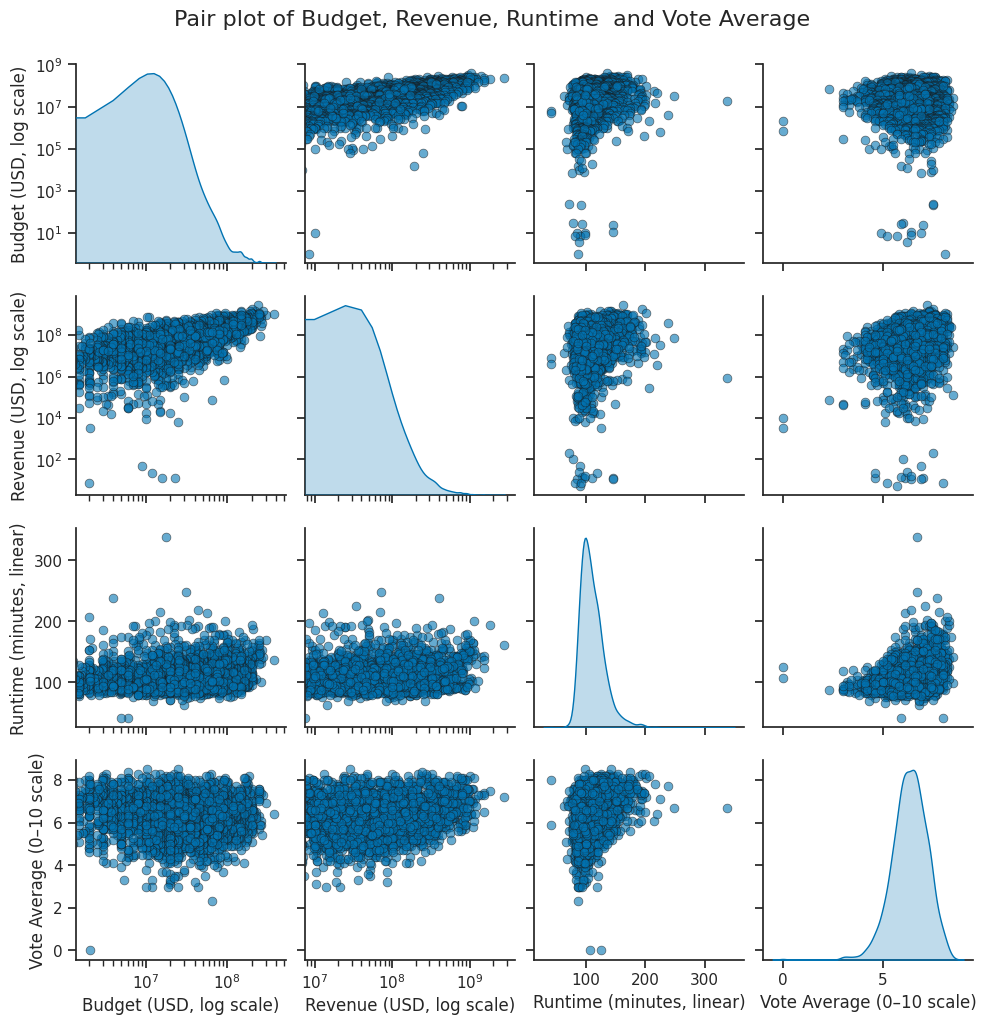

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select required columns
cols = ['budget', 'revenue', 'runtime', 'vote_average']
data = df_clean[cols].copy()

# Replace 0 with NaN for log-scale safety
data[['budget', 'revenue']] = data[['budget', 'revenue']].replace(0, np.nan)

# Set seaborn style and color palette
sns.set(style="ticks", palette="colorblind")

# Create pairplot
pair = sns.pairplot(
    data,
    diag_kind="kde",
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}
)

# Adjust axis labels with units and scales
for ax in pair.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()

        if xlabel == "budget":
            ax.set_xlabel("Budget (USD, log scale)")
            ax.set_xscale("log")
        elif xlabel == "revenue":
            ax.set_xlabel("Revenue (USD, log scale)")
            ax.set_xscale("log")
        elif xlabel == "runtime":
            ax.set_xlabel("Runtime (minutes, linear)")
        elif xlabel == "vote_average":
            ax.set_xlabel("Vote Average (0–10 scale)")

        if ylabel == "budget":
            ax.set_ylabel("Budget (USD, log scale)")
            ax.set_yscale("log")
        elif ylabel == "revenue":
            ax.set_ylabel("Revenue (USD, log scale)")
            ax.set_yscale("log")
        elif ylabel == "runtime":
            ax.set_ylabel("Runtime (minutes, linear)")
        elif ylabel == "vote_average":
            ax.set_ylabel("Vote Average (0–10 scale)")

# Title & subtitle
plt.suptitle(
    "Pair plot of Budget, Revenue, Runtime  and Vote Average",
    fontsize=16,
    y=1.02
)

plt.show()




### **1. Budget vs Revenue**

* There is a **positive correlation**: higher budgets generally lead to higher revenues.
* However, the spread is very wide → some **low-budget movies earn very high revenues**, while many **high-budget movies fail to recover costs**.
* This suggests that while big budgets increase the chance of high earnings, success is not guaranteed.

---

### **2. Runtime vs Other Factors**

* **Runtime vs Revenue/Budget**: Movies of most runtimes (80–180 minutes) span across different budget and revenue levels. No clear trend that longer movies earn more.
* Most movies cluster around **90–120 minutes**, which seems the standard runtime.

---

### **3. Vote Average (Audience Ratings)**

* Vote averages are **centered around 6–7** (most movies are average-rated).
* **No strong correlation with budget or revenue** → big-budget movies don’t necessarily get higher ratings.
* Some low-budget movies achieve high ratings .

---

### **4. Distribution Insights**

* **Budget & Revenue** follow **right-skewed (long-tail) distributions**, meaning a few movies dominate financially.
* **Runtime** shows a **tight normal-like distribution** centered near \~110 minutes.
* **Vote Average** distribution is narrow, with few extreme outliers (very low or very high rated films).

---

### **5. General Takeaways**

* **High budget → higher probability of high revenue, but not guaranteed success.**
* **Runtime is fairly standardized** in the industry (cluster around \~100–120 mins).
* **Audience ratings don’t depend much on money** (budget/revenue). Storytelling & quality matter more.
* Movie industry follows a **blockbuster-driven economy**: a small fraction of films account for most revenue.


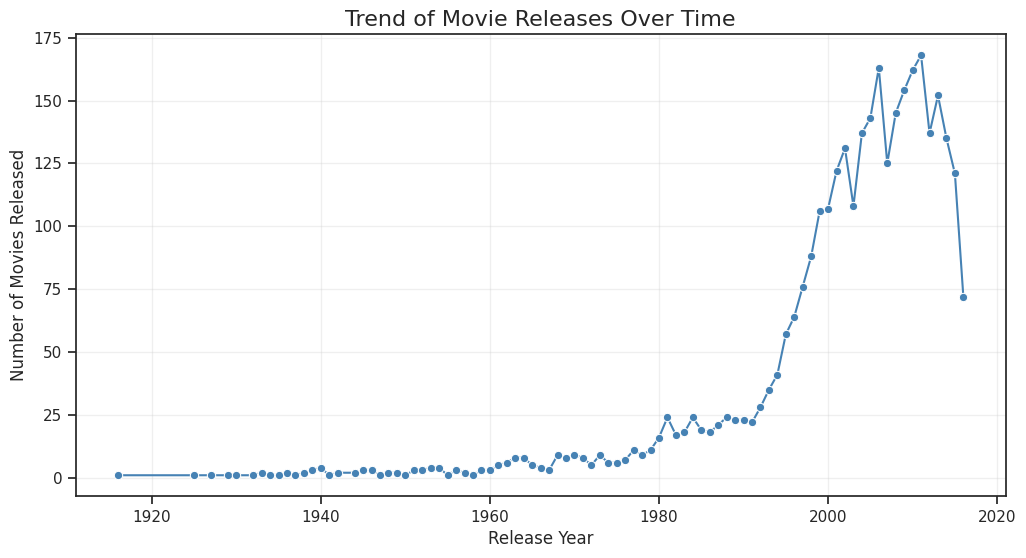

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract release year
df_clean['release_year'] = pd.to_datetime(df_clean['release_date'], errors='coerce').dt.year

# Count movies per year
movies_per_year = df_clean['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker="o", color="steelblue")
plt.title("Trend of Movie Releases Over Time", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies Released")
plt.grid(alpha=0.3)
plt.show()



### **Observations from the Trend of Movie Releases Over Time (1915–2017)**

1. **1920–1980: Gradual Growth**

   * Movie production was relatively **stable and slow-growing**.
   * Industry constraints like limited technology, distribution, and smaller global markets likely kept output low.

2. **1980–2000: Exponential Growth**

   * The number of movies released **increased rapidly**.
   * Reasons: globalization, expansion of Hollywood, VHS/DVD revolution, multiplex culture, and international co-productions.

3. **2000–2010: Stabilization**

   * The release count **stabilized at a high level** (around 120–170 movies annually in this dataset).
   * The rise of digital filmmaking and streaming platforms supported continued production.

4. **Post-2010: Decline**

   * A sharp **drop is observed after \~2015** in the dataset.
   * Possible reasons:

     * Incomplete data collection beyond 2015.
     * Industry shifts to digital-first releases not captured in TMDB.
     * Events like the **COVID-19 pandemic (2020 onwards)** severely impacted theatrical releases.


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


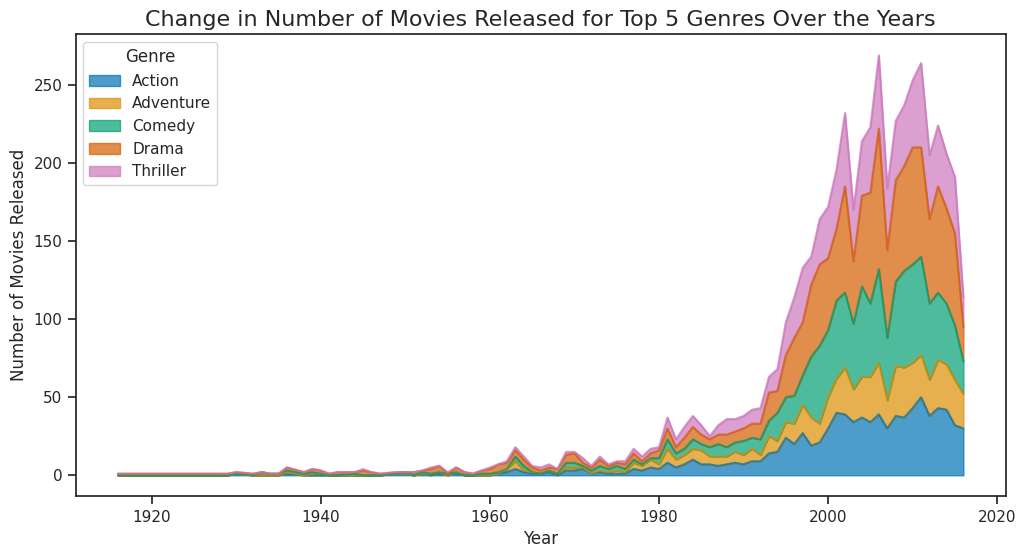

In [69]:
# Explode genres into rows
genres_df = df_clean[['release_year','all_genres']].explode('all_genres')

# Get top 5 genres overall
top5_genres = genres_df['all_genres'].value_counts().head(5).index

# Filter for top 5
top5_df = genres_df[genres_df['all_genres'].isin(top5_genres)]

# Count per year per genre
genre_trend = top5_df.groupby(['release_year','all_genres']).size().unstack(fill_value=0)

# Plot stacked area
genre_trend.plot.area(figsize=(12,6), alpha=0.7)
plt.title("Change in Number of Movies Released for Top 5 Genres Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.legend(title="Genre")
plt.show()


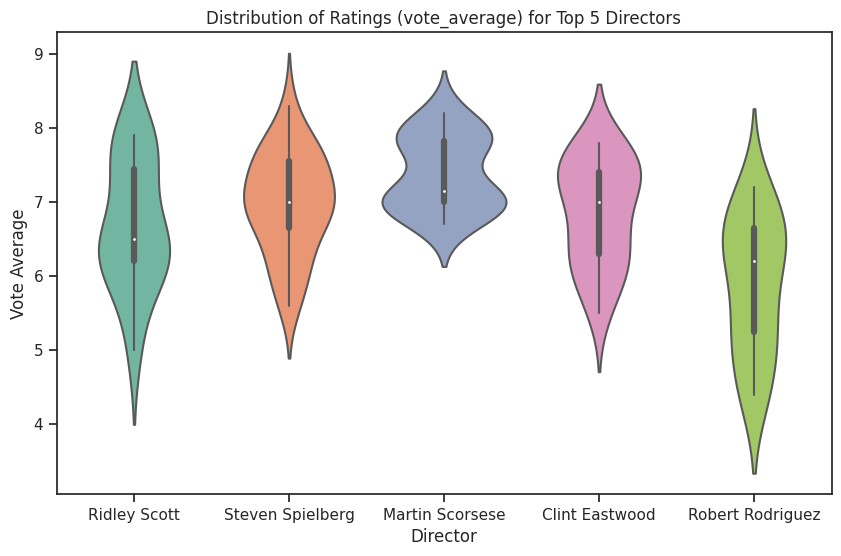

In [70]:
# Extract director from crew column
def extract_director(x):
    try:
        data = ast.literal_eval(x)
        for c in data:
            if c.get("job") == "Director":
                return c.get("name")
    except:
        return None

df_clean['director'] = df_clean['crew'].apply(extract_director)

# Get top 5 directors with most movies
top5_directors = df_clean['director'].value_counts().head(5).index

# Filter dataset
director_data = df_clean[df_clean['director'].isin(top5_directors)]

# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=director_data, x='director', y='vote_average', palette="Set2")
plt.title("Distribution of Ratings (vote_average) for Top 5 Directors")
plt.xlabel("Director")
plt.ylabel("Vote Average")
plt.show()

### Observation: Distribution of Ratings for Top 5 Directors

- **Martin Scorsese’s movies** have the highest median ratings with the distribution concentrated between 7 and 8, suggesting consistently well-rated films.
- **Steven Spielberg** and **Clint Eastwood** also show high average ratings, with most votes clustering around 7–8 but slightly wider spread, indicating more variability in quality.
- **Ridley Scott** and **Robert Rodriguez** show broader distributions with lower minimum ratings (extending below 5), indicating a mix of both highly-rated and poorly-rated movies.
- **Robert Rodriguez**’s rating distribution is the widest, with movies spanning from ratings below 5 up to 8, suggesting more diversity (and risk) in audience reception.
- Overall, while all directors achieve high average ratings, Scorsese’s films stand out for their consistently higher ratings and lower variance.

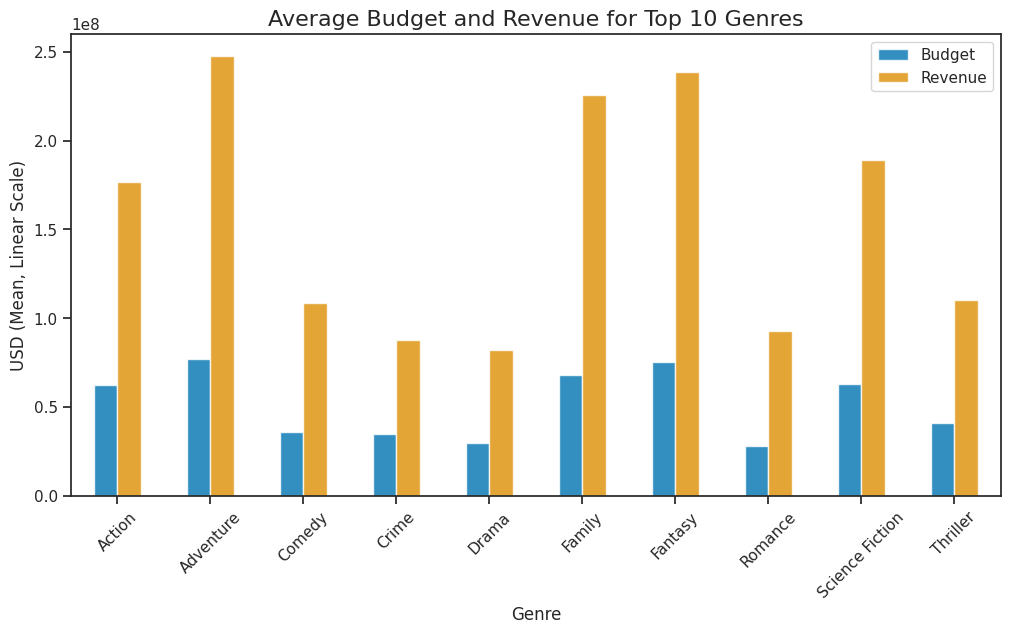

In [71]:
# Explode genres
genre_rev = df_clean.explode('all_genres')

# Get top 10 genres
top10_genres = genre_rev['all_genres'].value_counts().head(10).index

# Calculate mean budget & revenue
genre_stats = genre_rev[genre_rev['all_genres'].isin(top10_genres)] \
                .groupby('all_genres')[['budget','revenue']].mean()

# Plot
ax = genre_stats.plot(kind="bar", figsize=(12,6), alpha=0.8)
plt.title("Average Budget and Revenue for Top 10 Genres", fontsize=16)
plt.xlabel("Genre")
plt.ylabel("USD (Mean, Linear Scale)")
plt.xticks(rotation=45)
plt.legend(["Budget","Revenue"])
plt.show()


### **Observations from Budget vs Revenue by Genre**

1. **Top 3 Revenue-Generating Genres**

   * **Adventure, Fantasy, and Family** movies dominate revenue, often grossing **\$200M+ on average**.
   * These genres usually appeal to a global audience (e.g., superhero movies, animated franchises).

2. **High Budget – High Returns**

   * **Adventure & Fantasy** genres also have **very high average budgets (\~\$75M+)**, but their revenues **significantly exceed costs**, making them highly profitable.

3. **Family Genre’s Strong ROI**

   * Family movies achieve **massive revenues** despite having slightly **lower budgets than Adventure/Fantasy**, suggesting **high profitability and strong audience demand**.

4. **Moderate Revenue Genres**

   * **Comedy, Romance, and Drama** have **lower budgets and lower revenues**.
   * While cheaper to produce, their returns are not comparable to blockbuster genres.

5. **Balanced Genres**

   * **Action and Science Fiction** show a strong balance: **mid-to-high budgets** with **consistently high revenues**, making them reliable for big studios.


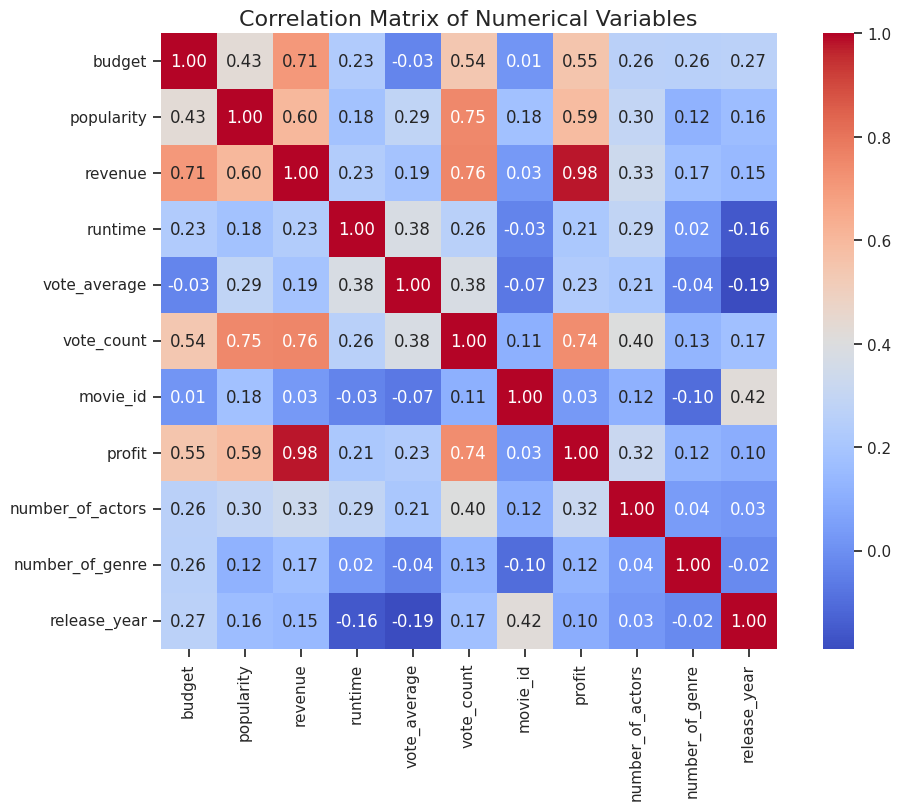

In [72]:
# Select numeric columns
num_df = df_clean.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.show()


###  Observations from the Correlation Matrix

1. **Revenue, Profit, and Budget**

   * Revenue and profit have an **extremely high correlation (0.98)** → makes sense, since profit = revenue − budget.
   * Budget and revenue are also **strongly correlated (0.71)** → higher-budget films usually earn more revenue.
   * Profit and budget are moderately correlated (0.55) → higher budgets often yield bigger profits, but not always proportionally.

2. **Popularity & Vote Counts**

   * Popularity is strongly correlated with vote\_count (0.75) → the more popular a movie, the more people vote/rate it.
   * Popularity also has a decent correlation with revenue (0.60) and profit (0.59) → popular movies generally make more money.

3. **Runtime**

   * Runtime has **weak correlation with revenue (0.23) and profit (0.21)** → longer movies don’t guarantee higher success.

4. **Vote Average (rating)**

   * Vote\_average has **low correlation with profit (0.03) and revenue (0.19)** → critical acclaim doesn’t necessarily mean financial success.

5. **Actors & Genres**

   * Number\_of\_actors has only weak correlation with profit (0.32).
   * Number\_of\_genres has almost no correlation with success metrics → genre count alone doesn’t explain profitability.

In short: **Financial success is most tied to budget, revenue, popularity, and vote\_count — not so much runtime, ratings, or number of genres.**


### Visualizations for hypothesis

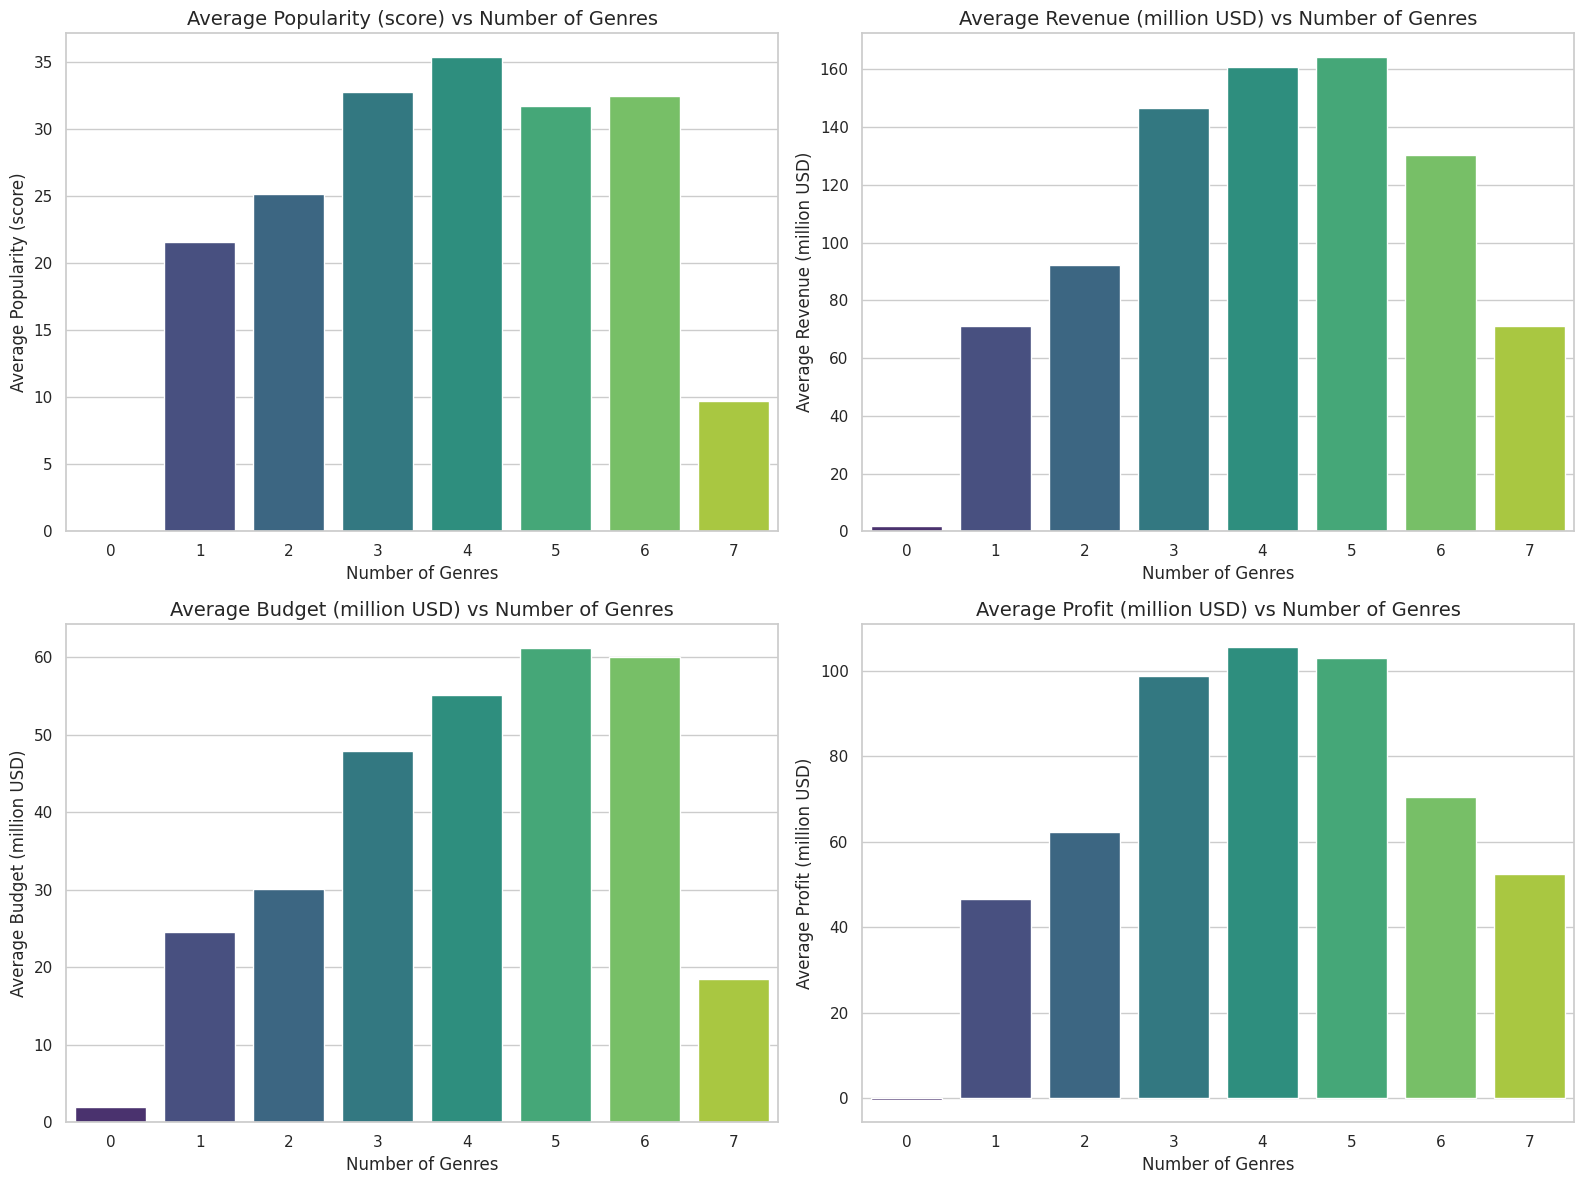

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute profit
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']

# Convert financial metrics to millions USD for readability
df_clean['revenue_million'] = df_clean['revenue'] / 1e6
df_clean['budget_million']  = df_clean['budget']  / 1e6
df_clean['profit_million']  = df_clean['profit']  / 1e6

# Set plot style
sns.set(style="whitegrid")

# Metrics to plot: (new fields for financial metrics)
metrics = [
    ('popularity', 'Popularity (score)'),
    ('revenue_million',  'Revenue (million USD)'),
    ('budget_million',   'Budget (million USD)'),
    ('profit_million',   'Profit (million USD)')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (metric, label) in enumerate(metrics):
    sns.barplot(
        data=df_clean,
        x='number_of_genre',
        y=metric,
        estimator='mean',  # average values
        ci=None,
        palette="viridis",
        ax=axes[idx]
    )
    axes[idx].set_title(f"Average {label} vs Number of Genres", fontsize=14)
    axes[idx].set_xlabel("Number of Genres")
    axes[idx].set_ylabel(f"Average {label}")

plt.tight_layout()
plt.show()


 **Barplots (Average Popularity, Revenue, Budget, Profit vs Number of Genres)** → Movies with 3–5 genres tend to do best on average across revenue and profit.


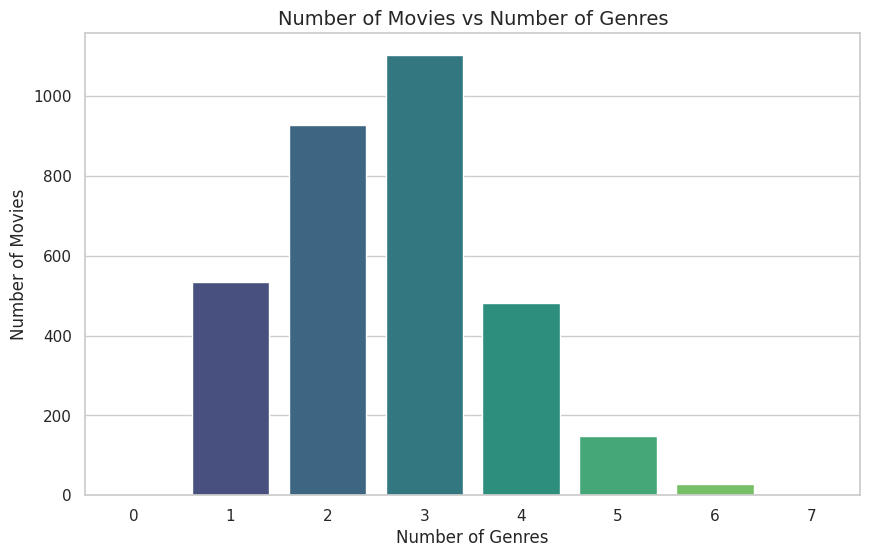

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of movies per number_of_genre
genre_count = df_clean['number_of_genre'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.index, y=genre_count.values, palette="viridis")

plt.title("Number of Movies vs Number of Genres", fontsize=14)
plt.xlabel("Number of Genres", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=0)
plt.show()


**Movie Count vs Number of Genres** → Most movies have **2–3 genres**, very few have 5–7 genres.


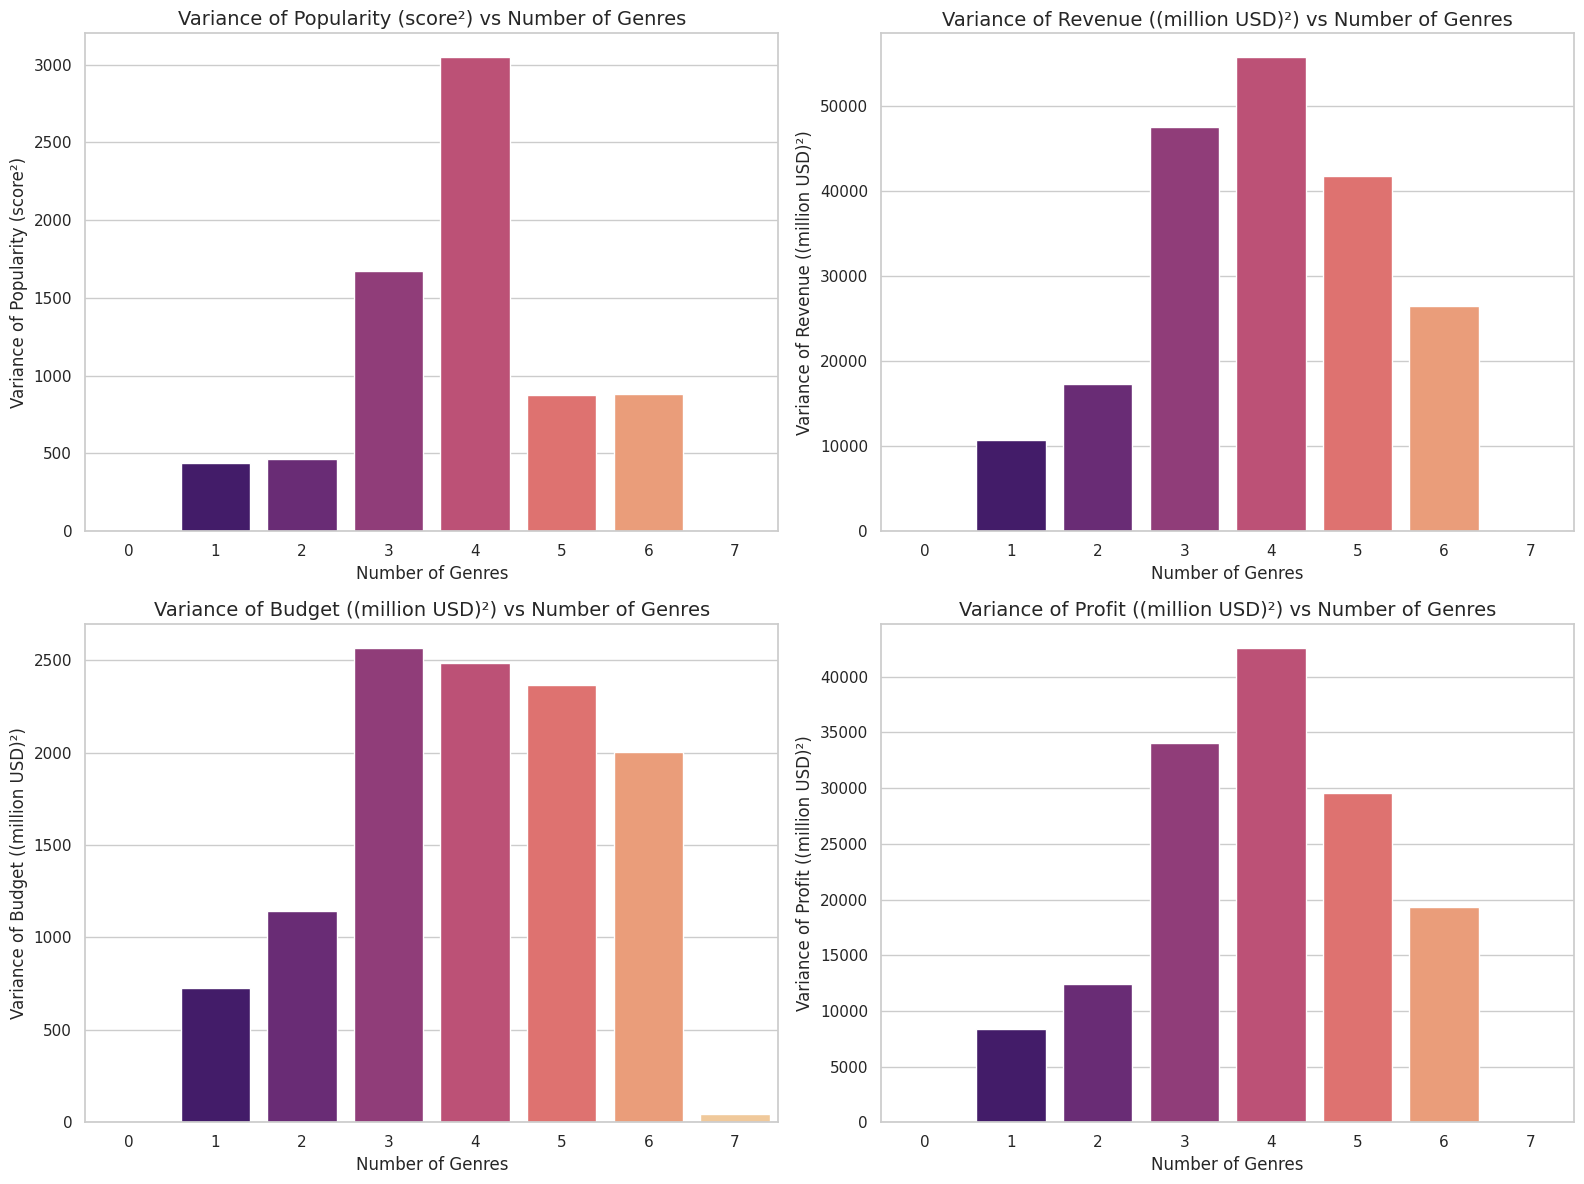

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute profit
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']

# If you previously converted revenue/budget/profit to millions for plotting,
# variance for those would be in (million USD)^2 units.
df_clean['revenue_million'] = df_clean['revenue'] / 1e6
df_clean['budget_million']  = df_clean['budget']  / 1e6
df_clean['profit_million']  = df_clean['profit']  / 1e6

# Set plot style
sns.set(style="whitegrid")

# Metrics to plot: (new fields for financial metrics)
metrics = [
    ('popularity', 'Popularity (score²)'),
    ('revenue_million',  'Revenue ((million USD)²)'),
    ('budget_million',   'Budget ((million USD)²)'),
    ('profit_million',   'Profit ((million USD)²)')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (metric, label) in enumerate(metrics):
    sns.barplot(
        data=df_clean,
        x='number_of_genre',
        y=metric,
        estimator=np.var,  # variance instead of mean
        ci=None,
        palette="magma",
        ax=axes[idx]
    )
    axes[idx].set_title(f"Variance of {label} vs Number of Genres", fontsize=14)
    axes[idx].set_xlabel("Number of Genres")
    axes[idx].set_ylabel(f"Variance of {label}")

plt.tight_layout()
plt.show()


 **Variance Plots** → High variance in revenue and profit for movies with 3–5 genres, meaning while averages are higher, outcomes are riskier.


### **Conclusion**  
The analysis does **not fully support** the hypothesis that a higher number of genres always leads to higher profit. Instead, the data suggests:  

- Movies with **3–5 genres** on average achieve **higher revenue and profit** compared to those with fewer genres.  
- However, adding more than 5 genres does **not guarantee further increases**, and in fact performance tends to flatten or decline.  
- Financial outcomes for 3–5 genre movies show **high variance**, meaning while they can be more profitable, the risk of underperformance is also greater.  
- Most movies cluster around **2–3 genres**, indicating that studios may prefer to balance **audience reach** with **predictability**.  

***
 
*The hypothesis is only partially valid — profits generally increase with genre count up to a point (3–5 genres), but beyond that, returns are inconsistent and riskier.*  
